# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
!pip install matplotlib-venn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

# Read and clean data

We are importing our data using an API for Danmarks statistik.

In [4]:
# installing API reader, that will allow to load data from DST.
%pip install git+https://github.com/alemartinello/dstapi
%pip install pandas-datareader

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`


  Cloning https://github.com/alemartinello/dstapi to c:\users\jacob\appdata\local\temp\pip-req-build-bw2wsu8u
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dstapi: filename=dstapi-0.2-py3-none-any.whl size=4168 sha256=345223539384edd71e97e9616449f3513a2f17e268e57acd51f5ac5aa99ab71a
  Stored in directory: C:\Users\jacob\AppData\Local\Temp\pip-ephem-wheel-cache-jueg412z\wheels\ca\b0\b7\45b1e76d7ccf05d24f2e1a07766881219814afa86b02a999b2
Successfully built dstapi


  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi 'C:\Users\jacob\AppData\Local\Temp\pip-req-build-bw2wsu8u'


   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/109.5 kB 165.2 kB/s eta 0:00:01
   ------------------ -------------------- 51.2/109.5 kB 290.5 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 530.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
forsyningsbalanen = DstApi('NAN1')
tabsum = forsyningsbalanen.tablesummary(language = 'en')
display(tabsum)
for variable in tabsum['variable name']:
    print(variable+':')
    display(forsyningsbalanen.variable_levels(variable, language='en'))

Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-03-27T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LAN_C,"Pr. capita, 2010-prices, chained values, (1000...",False
2,Tid,58,1966,1966,2023,2023,True


TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2010-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


  variable name  # values First value             First value label  \
0      TRANSAKT        31       B1GQK  B.1*g Gross domestic product   
1     PRISENHED         6         V_M  Current prices, (bill. DKK.)   
2           Tid        58        1966                          1966   

  Last value                                   Last value label  Time variable  
0    EMPM_DC                   Total employment (1,000 persons)          False  
1      LAN_C  Pr. capita, 2010-prices, chained values, (1000...          False  
2       2023                                               2023           True  


In [6]:
kvartal_bnp = DstApi('NKN1')
tabsum2 = kvartal_bnp.tablesummary(language = 'en')
display(tabsum2)
for variable in tabsum['variable name']:
    print(variable+':')
    display(kvartal_bnp.variable_levels(variable, language='en'))

Table NKN1: Demand and supply by transaction, price unit, seasonal adjustment and time
Last update: 2024-03-27T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,TRANSAKT,31,B1GQK,B.1*g Gross domestic product,EMPM_DC,"Total employment (1,000 persons)",False
1,PRISENHED,6,V_M,"Current prices, (bill. DKK.)",LKV_C,"Pr. capita, 2010-prices, chained values, (1000...",False
2,SÆSON,2,N,Non-seasonally adjusted,Y,Seasonally adjusted,False
3,Tid,136,1990K1,1990Q1,2023K4,2023Q4,True


TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,L_V,Period-to-period real growth (per cent)
2,V_C,"Pr. capita. Current prices, (1000 DKK.)"
3,LKV_M,"2010-prices, chained values, (bill. DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LKV_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1990K1,1990Q1
1,1990K2,1990Q2
2,1990K3,1990Q3
3,1990K4,1990Q4
4,1991K1,1991Q1
...,...,...
131,2022K4,2022Q4
132,2023K1,2023Q1
133,2023K2,2023Q2
134,2023K3,2023Q3


In [30]:
params = forsyningsbalanen._define_base_params(language= 'en')

list1 = forsyningsbalanen.get_data(params=params)
print(list1)

                           TRANSAKT  \
0      B.1*g Gross domestic product   
1      B.1*g Gross domestic product   
2      B.1*g Gross domestic product   
3      B.1*g Gross domestic product   
4      B.1*g Gross domestic product   
...                             ...   
10783         Final domestic demand   
10784         Final domestic demand   
10785         Final domestic demand   
10786         Final domestic demand   
10787         Final domestic demand   

                                               PRISENHED   TID INDHOLD  
0      Pr. capita, 2010-prices, chained values, (1000...  1979   205.8  
1              2010-prices, chained values, (bill. DKK.)  1979  1053.2  
2               Period-to-period real growth (per cent)   1979     3.9  
3         Contribution to GDP growth, (percentage point)  1979     3.9  
4                Pr. capita. Current prices, (1000 DKK.)  1979    72.3  
...                                                  ...   ...     ...  
10783          2010-

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [8]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

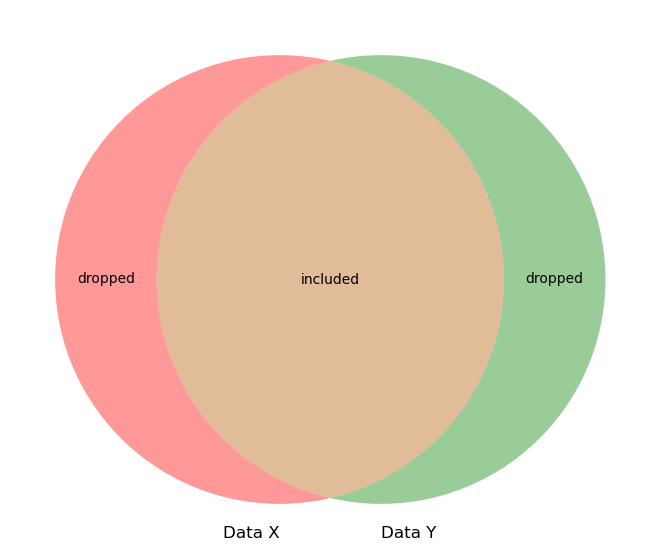

In [9]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.